# TP 3 : Classification non linéaire 
# Dani Halegua, Luca Champesting et Idyano Leroy

Dans ce TP, nous allons tenter de retrouver des classes qui ne peuvent pas être correctement retrouvées par un classifieur linéaire. On va donc, selon le principe des SVM, transformer les données de l'espace image vers un espace des caracéristiques ("feature space") par une transformation non-linéaire. Nous allons essayer un cas de transformation explicite et un cas de transformation implicite pour un noyau gaussien.
Comme transformation explicite, nous considérons la transformation polynomiale :

$$x = (x_1,x_2) \rightarrow \Phi (x) \overset{\Delta}{=} (x_1^i x_2^j)_{1\leq i+j \leq dPoly} .$$

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exercice 1 :
(1)

In [105]:
def y(x1, x2):
    if ( -1 <= x1 <= -0.5 or 0 <= x1 <= 0.5) and ( -1 <= x2 <= -0.5 or 0 <= x2 <= 0.5):
        return 1
    elif ( -0.5 <= x1 <= 0 or 0.5 <= x1 <= 1) and ( -0.5 <= x2 <= 0 or 0.5 <= x2 <= 1):
        return 1
    else :
        return -1

def ech_train_test(nbApp, nbTest):
    X_train = np.random.uniform(-1, 1, (nbApp, 2))
    y_train = np.zeros(nbApp)
    X_test = np.random.uniform(-1, 1, (nbTest, 2))
    y_test = np.zeros(nbTest)
    for i in range(nbApp):
        y_train[i] = y(X_train[:,0][i], X_train[:,1][i])
    for j in range(nbTest):
        y_test[j] = y(X_test[:,0][j], X_test[:,1][j])
    return X_train, y_train, X_test, y_test

nbApp = 300; nbTest = 1000
X_train, y_train, X_test, y_test = ech_train_test(nbApp, nbTest)

In [106]:
X_train

array([[ 0.36435206, -0.90409456],
       [-0.256791  ,  0.56322338],
       [-0.68503207, -0.82834408],
       [-0.72455541,  0.14856528],
       [ 0.65163324, -0.54542993],
       [ 0.75394743, -0.68159328],
       [-0.6891519 , -0.62237209],
       [ 0.29461762,  0.00516346],
       [ 0.48036842, -0.77176606],
       [-0.75204781,  0.67207642],
       [ 0.31154987,  0.43058456],
       [-0.79374081, -0.89616589],
       [ 0.53189144,  0.67003865],
       [-0.71094791, -0.40303621],
       [ 0.29590745, -0.03439349],
       [ 0.22366716,  0.73198458],
       [-0.62638814,  0.80924899],
       [ 0.7409709 , -0.67548581],
       [-0.47663599, -0.966841  ],
       [-0.37041086,  0.91844101],
       [ 0.11858332, -0.15730478],
       [-0.71627182, -0.95103006],
       [-0.97070582, -0.5273462 ],
       [-0.31451793, -0.14708685],
       [-0.2214703 , -0.27306802],
       [ 0.10065318,  0.17809786],
       [ 0.16616262, -0.42495655],
       [ 0.92960987,  0.23727186],
       [ 0.20315411,

(2) :

In [107]:

def create_data(X,dpoly): #effectue la transformation sur un echantillon
    dim=0
    for i in range(dpoly+1):
        for j in range(dpoly+1-i):
            dim+=1
    X_features=np.zeros((len(X),dim))
    dim=0
    for i in range(dpoly+1):
        for j in range(dpoly+1-i):
            X_features[:,dim]=X[:,0]**i*X[:,1]**j
            dim+=1
    return pd.DataFrame(X_features)

(3) :

In [108]:
dpoly = 5
X_train2 = create_data(X_train,dpoly)
X_test2 = create_data(X_test,dpoly)

In [109]:
X_train2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,-0.904095,0.817387,-0.738995,0.668121,-0.604045,0.364352,-0.329409,0.297817,-0.269254,...,0.132752,-0.120021,0.108510,-0.098103,0.048369,-0.043730,0.039536,0.017623,-0.015933,0.006421
1,1.0,0.563223,0.317221,0.178666,0.100629,0.056677,-0.256791,-0.144631,-0.081459,-0.045880,...,0.065942,0.037140,0.020918,0.011782,-0.016933,-0.009537,-0.005372,0.004348,0.002449,-0.001117
2,1.0,-0.828344,0.686154,-0.568372,0.470807,-0.389990,-0.685032,0.567442,-0.470037,0.389353,...,0.469269,-0.388716,0.321991,-0.266719,-0.321464,0.266283,-0.220574,0.220213,-0.182412,-0.150853
3,1.0,0.148565,0.022072,0.003279,0.000487,0.000072,-0.724555,-0.107644,-0.015992,-0.002376,...,0.524981,0.077994,0.011587,0.001721,-0.380377,-0.056511,-0.008396,0.275605,0.040945,-0.199691
4,1.0,-0.545430,0.297494,-0.162262,0.088503,-0.048272,0.651633,-0.355420,0.193857,-0.105735,...,0.424626,-0.231604,0.126324,-0.068901,0.276700,-0.150921,0.082317,0.180307,-0.098345,0.117494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.939019,0.881757,0.827987,0.777496,0.730084,-0.707796,-0.664635,-0.624105,-0.586046,...,0.500976,0.470426,0.441739,0.414802,-0.354589,-0.332966,-0.312661,0.250977,0.235672,-0.177640
296,1.0,0.511468,0.261599,0.133800,0.068434,0.035002,0.785715,0.401868,0.205543,0.105128,...,0.617348,0.315754,0.161498,0.082601,0.485060,0.248093,0.126891,0.381119,0.194930,0.299451
297,1.0,0.794393,0.631060,0.501309,0.398236,0.316356,0.600861,0.477320,0.379179,0.301217,...,0.361034,0.286803,0.227834,0.180990,0.216932,0.172329,0.136897,0.130346,0.103546,0.078320
298,1.0,0.596744,0.356104,0.212503,0.126810,0.075673,-0.589183,-0.351591,-0.209810,-0.125203,...,0.347136,0.207152,0.123617,0.073767,-0.204527,-0.122050,-0.072833,0.120504,0.071910,-0.070999


## Noyau linéaire

In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as AS

In [111]:
C = 0.1
clf = SVC(C=C, kernel='linear')
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

(4) :

In [112]:

print("Précision du modèle",AS(y_pred,y_test))

Précision du modèle 0.498


In [113]:
def afficher(X_train,y_train,X_test,y_test,y_pred):
    
    plt.figure(figsize=(16,8))
    plt.subplots_adjust(wspace=0.5)
    
    plt.subplot(1,2,1)
    plt.title("Train")
    for i in range(X_train.shape[0]):
        if (y_train[i]==-1): 
            plt.scatter(X_train[i][0],X_train[i][1],color ='red')
        elif (y_train[i]==1):
            plt.scatter(X_train[i][0],X_train[i][1],color ='blue')
    
    plt.subplot(1,2,2)
    plt.title("Test")
    for i in range(X_test.shape[0]):                                              #bien classé = rond
        if (y_test[i]==-1) and (y_pred[i]==-1):                                   #mal classé = croix
            plt.scatter(X_test[i][0],X_test[i][1],color ='red')                   #rouge = -1
        elif(y_test[i]==-1) and (y_pred[i]==1):                                   #bleu =1
            plt.scatter(X_test[i][0],X_test[i][1],color ='red',marker ='x')
        elif(y_test[i]==1) and (y_pred[i]==1): 
            plt.scatter(X_test[i][0],X_test[i][1],color ='blue')
        else: 
            plt.scatter(X_test[i][0],X_test[i][1],color ='blue',marker='x')
    plt.show()

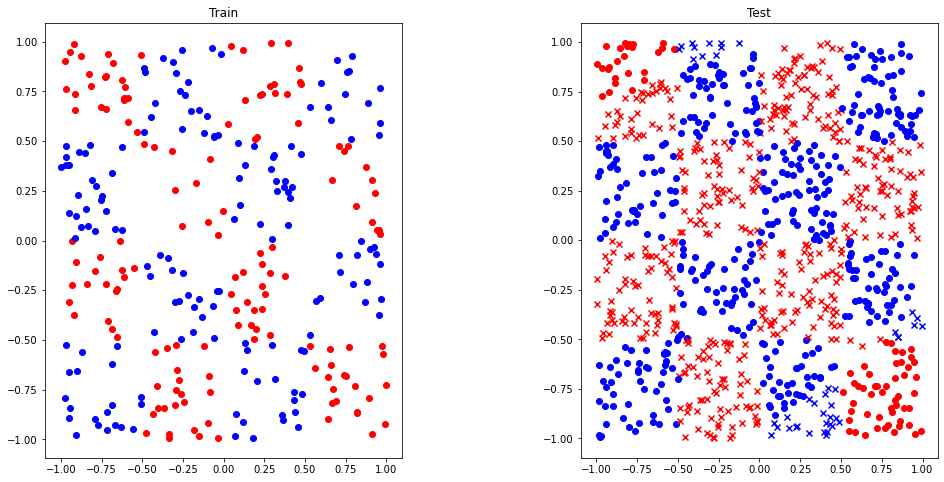

In [114]:
afficher(X_train,y_train,X_test,y_test,y_pred)

(5) :

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.87it/s]


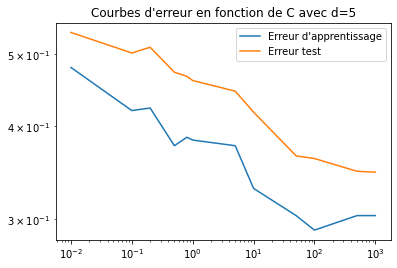

In [115]:
from tqdm import tqdm
C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
err_test=[]
err_train=[]
for c in tqdm(C):
    clf = SVC(C=c, kernel='linear')
    clf.fit(X_train2,y_train)
    y_pred = clf.predict(X_test2)
    err_train+=[1-clf.score(X_train2,y_train)]
    err_test+=[1-AS(y_pred,y_test)]

plt.title("Courbes d'erreur en fonction de C avec d=5")
plt.loglog(C,err_train,label="Erreur d'apprentissage")
plt.loglog(C,err_test,label="Erreur test")
plt.legend()
plt.show()

In [116]:
err_train

[0.48,
 0.42000000000000004,
 0.42333333333333334,
 0.3766666666666667,
 0.3866666666666667,
 0.3833333333333333,
 0.3766666666666667,
 0.32999999999999996,
 0.30333333333333334,
 0.29000000000000004,
 0.30333333333333334,
 0.30333333333333334]

In [117]:
err_test

[0.5349999999999999,
 0.502,
 0.511,
 0.473,
 0.46699999999999997,
 0.46099999999999997,
 0.44599999999999995,
 0.41800000000000004,
 0.365,
 0.362,
 0.348,
 0.347]

Meilleur score pour $C=1000$

(6) :

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


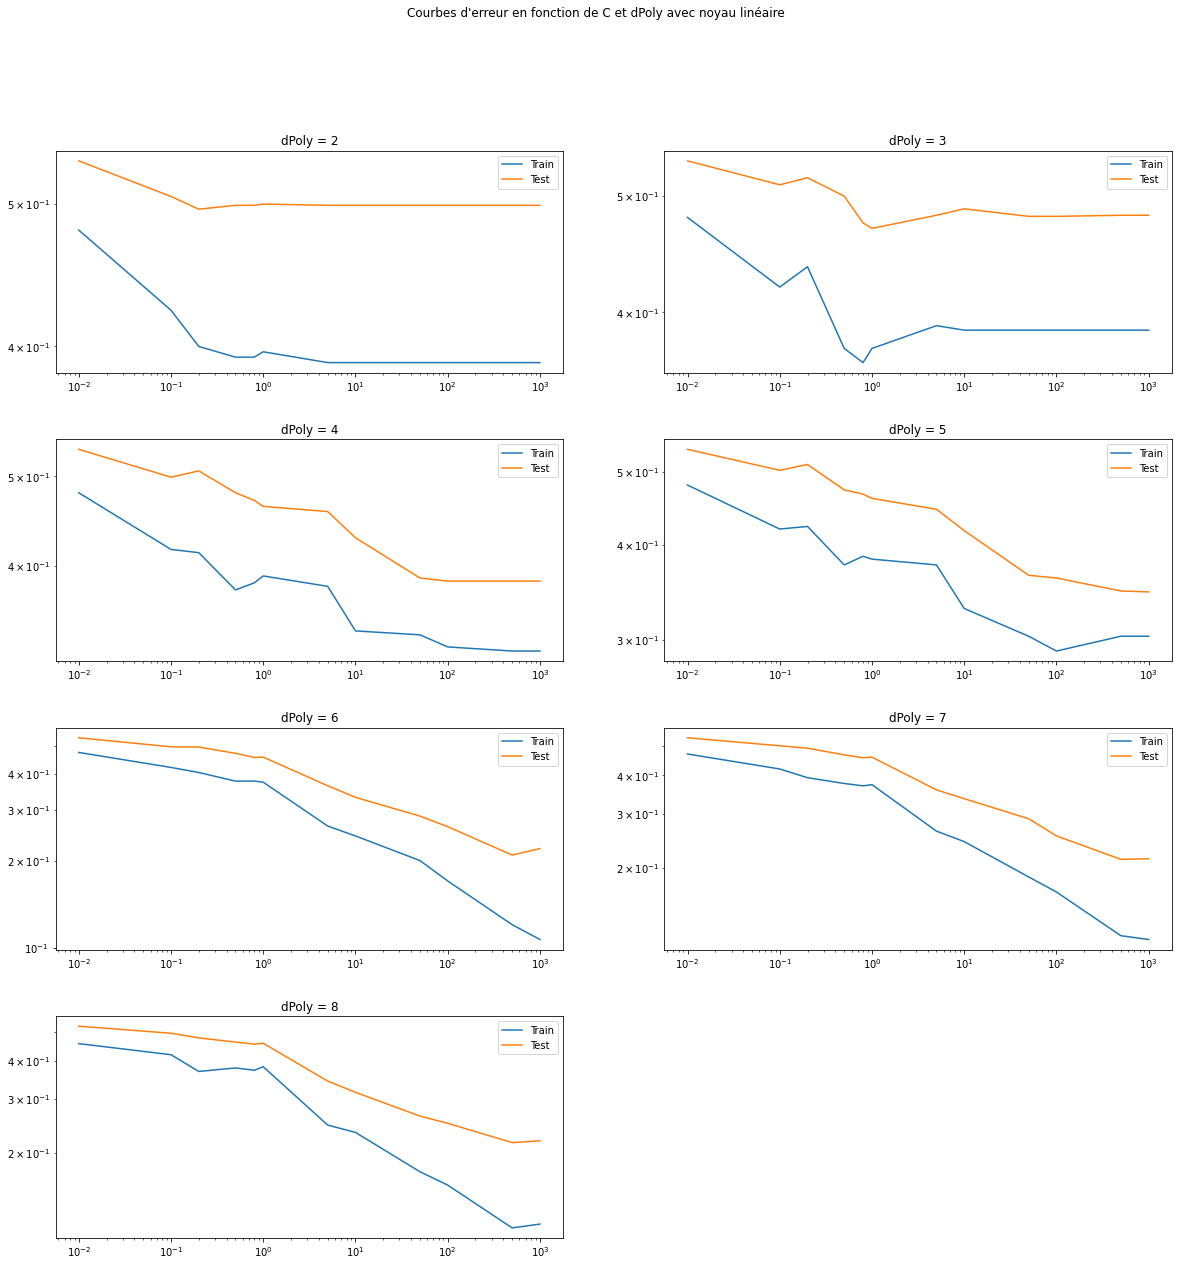

In [118]:
dpoly=[i for i in range(2,9)]

C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
best_err = 1
best_C = 0
best_d = 0
best_precision = 0
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)

for d in tqdm(dpoly):
    X_train2 = create_data(X_train,d)
    X_test2 = create_data(X_test,d)
    err_test=[]
    err_train=[]
    
    for c in C:
        clf = SVC(C=c, kernel='linear')
        clf.fit(X_train2,y_train)
        y_pred = clf.predict(X_test2)
        err_train+=[1-clf.score(X_train2,y_train)]
        err_test+=[1-AS(y_pred,y_test)]
        if (1-AS(y_pred,y_test))<best_err :        #on garde en mémoire les best params
            best_err = 1-AS(y_pred,y_test)
            best_precision = AS(y_pred,y_test)
            best_C = c
            best_d = d

    plt.subplot(4,2,d-1)
    plt.title("dPoly = "+str(d))
    plt.loglog(C,err_train,label="Train")
    plt.loglog(C,err_test,label="Test")
    plt.legend()
plt.suptitle("Courbes d'erreur en fonction de C et dPoly avec noyau linéaire")
plt.show()
    
    


In [119]:
print("Meilleur score atteint pour dpoly = ", best_d ,"\n C =", best_C, "\n Precision associée :", best_precision, "\n Erreur associée :", best_err )

Meilleur score atteint pour dpoly =  6 
 C = 500 
 Precision associée : 0.791 
 Erreur associée : 0.20899999999999996


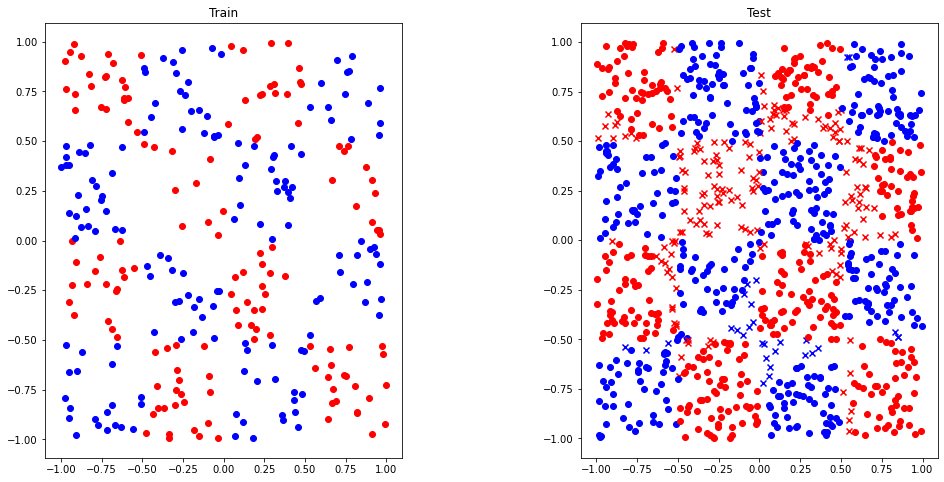

In [120]:
X_train2 = create_data(X_train,best_d)
X_test2 = create_data(X_test,best_d)
    
clf = SVC(C=best_C, kernel='linear')
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

afficher(X_train,y_train,X_test,y_test,y_pred)

(7)
## Noyau gaussien
Kernel par défaut dans scikit-learn

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.18it/s]


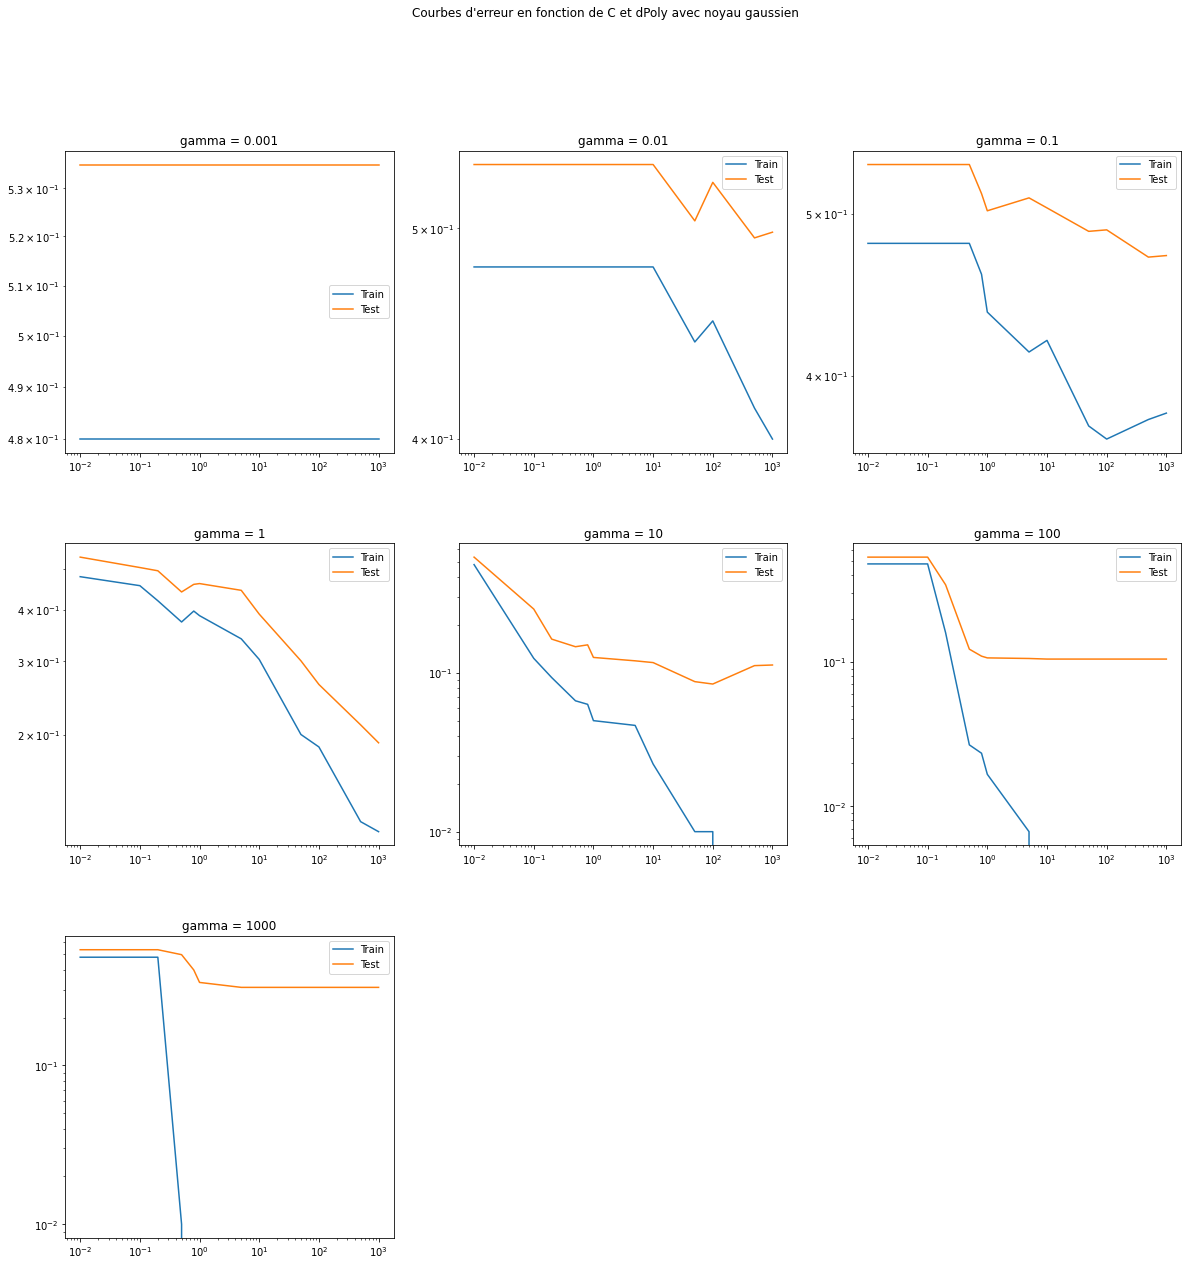

In [149]:
gammas = [0.001, 0.01, 0.1, 1, 10, 100,1000]

C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
best_err = 1
best_C = 0
best_gamma = 0
best_precision = 0
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
i=0

for gamma in tqdm(gammas):
    err_test=[]
    err_train=[]
    
    for c in C:
        clf = SVC(C=c, gamma = gamma, kernel ='rbf')
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        err_train+=[1-clf.score(X_train,y_train)]
        err_test+=[1-AS(y_pred,y_test)]
        if (1-AS(y_pred,y_test))<best_err :        #on garde en mémoire les best params
            best_err = 1-AS(y_pred,y_test)
            best_precision = AS(y_pred,y_test)
            best_C = c
            best_gamma = gamma
    i+=1
    plt.subplot(3,3,i)
    plt.title("gamma = "+str(gamma))
    plt.loglog(C,err_train,label="Train")
    plt.loglog(C,err_test,label="Test")
    plt.legend()
plt.suptitle("Courbes d'erreur en fonction de C et dPoly avec noyau gaussien")
plt.show()
    

In [150]:
print("Meilleur score atteint pour gamma = ", best_gamma ,"\n C =", best_C, "\n Precision associée :", best_precision, "\n Erreur associée :", best_err )

Meilleur score atteint pour gamma =  10 
 C = 100 
 Precision associée : 0.915 
 Erreur associée : 0.08499999999999996


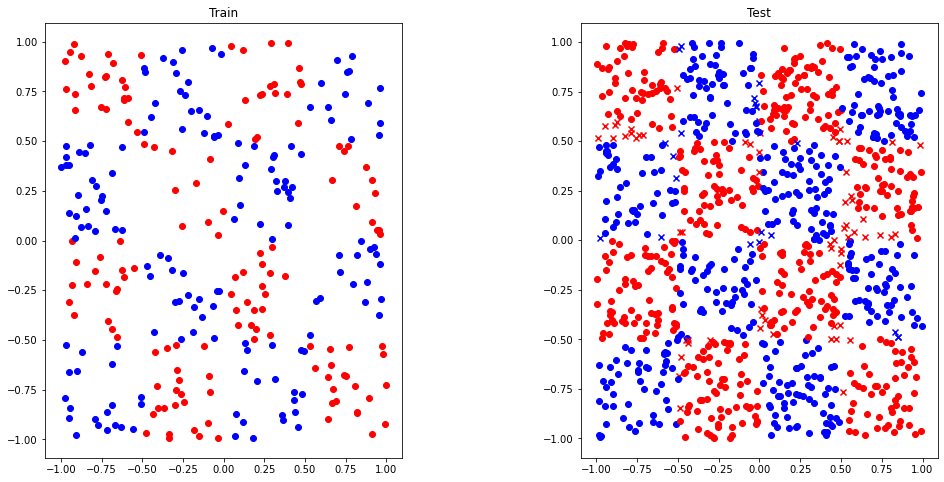

In [160]:
clf = SVC(C=best_C,gamma=best_gamma, kernel='rbf')            
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

afficher(X_train,y_train,X_test,y_test,y_pred)  

## Noyau polynomial
Après avoir testé avec les noyaux linéaire et gaussien, on teste avec le noyau polynomial.
On garde les paramètres par défaut de scikit-learn

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.45it/s]


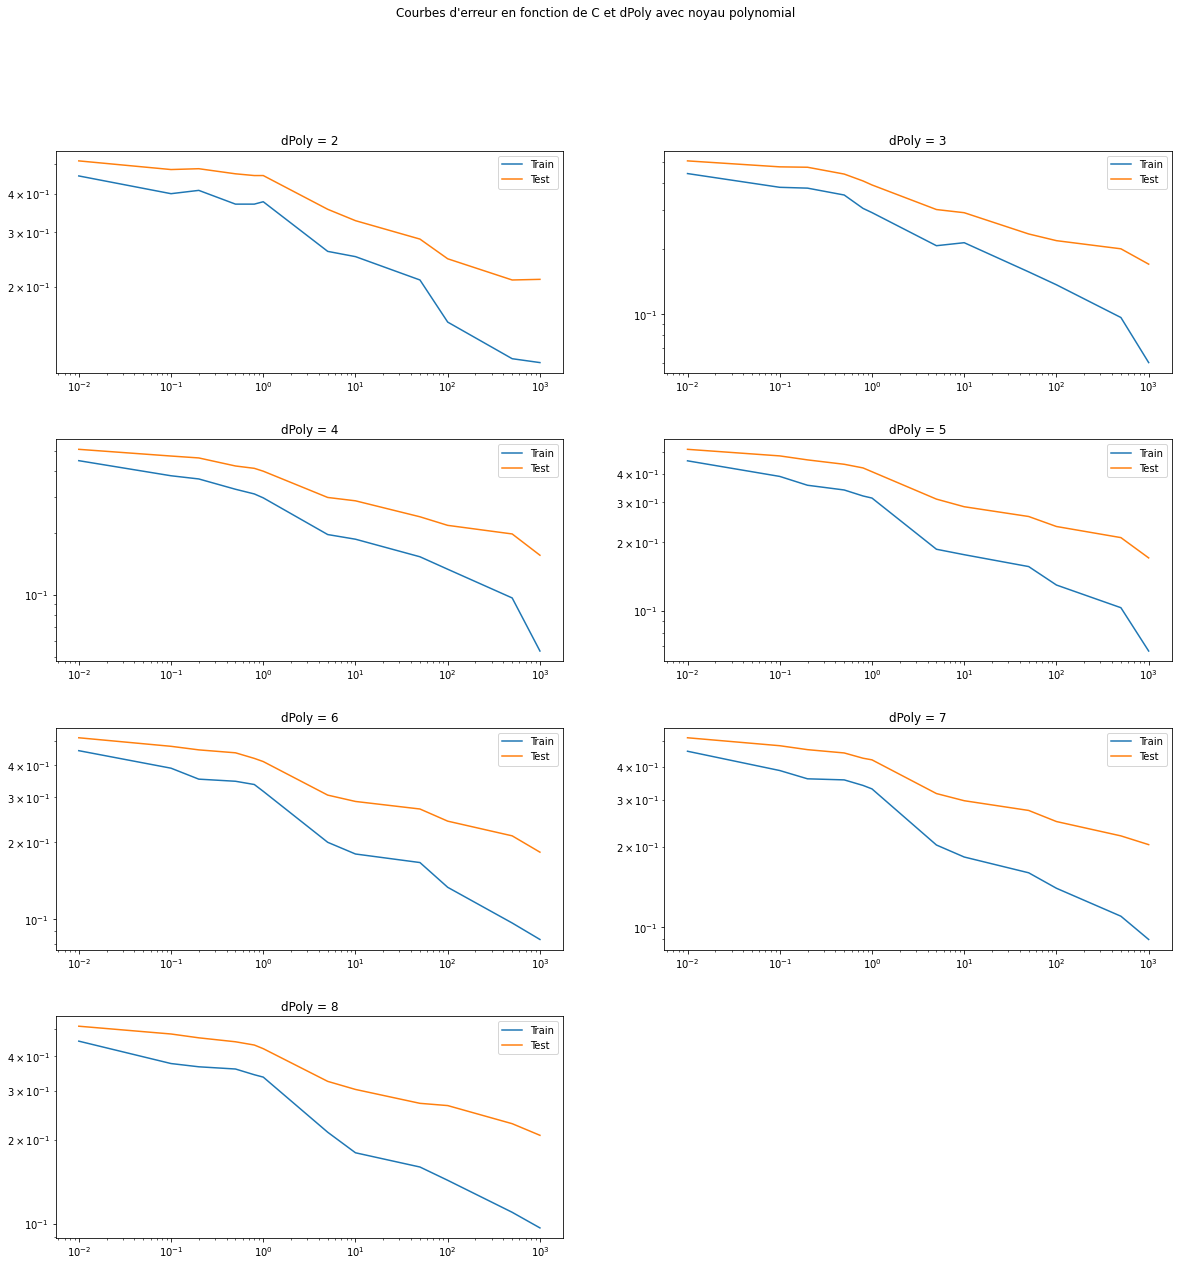

In [161]:
dpoly=[i for i in range(2,9)]

C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
best_err = 1
best_C = 0
best_d = 0
best_precision = 0
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)

for d in tqdm(dpoly):
    X_train2 = create_data(X_train,d)
    X_test2 = create_data(X_test,d)
    err_test=[]
    err_train=[]
    
    for c in C:
        clf = SVC(C=c, kernel='poly')
        clf.fit(X_train2,y_train)
        y_pred = clf.predict(X_test2)
        err_train+=[1-clf.score(X_train2,y_train)]
        err_test+=[1-AS(y_pred,y_test)]
        if (1-AS(y_pred,y_test))<best_err :        #on garde en mémoire les best params
            best_err = 1-AS(y_pred,y_test)
            best_precision = AS(y_pred,y_test)
            best_C = c
            best_d = d

    plt.subplot(4,2,d-1)
    plt.title("dPoly = "+str(d))
    plt.loglog(C,err_train,label="Train")
    plt.loglog(C,err_test,label="Test")
    plt.legend()
plt.suptitle("Courbes d'erreur en fonction de C et dPoly avec noyau polynomial")
plt.show()
    

In [162]:
print("Meilleur score atteint pour dpoly = ", best_d ,"\n C =", best_C, "\n Precision associée :", best_precision, "\n Erreur associée :", best_err )

Meilleur score atteint pour dpoly =  4 
 C = 1000 
 Precision associée : 0.844 
 Erreur associée : 0.15600000000000003


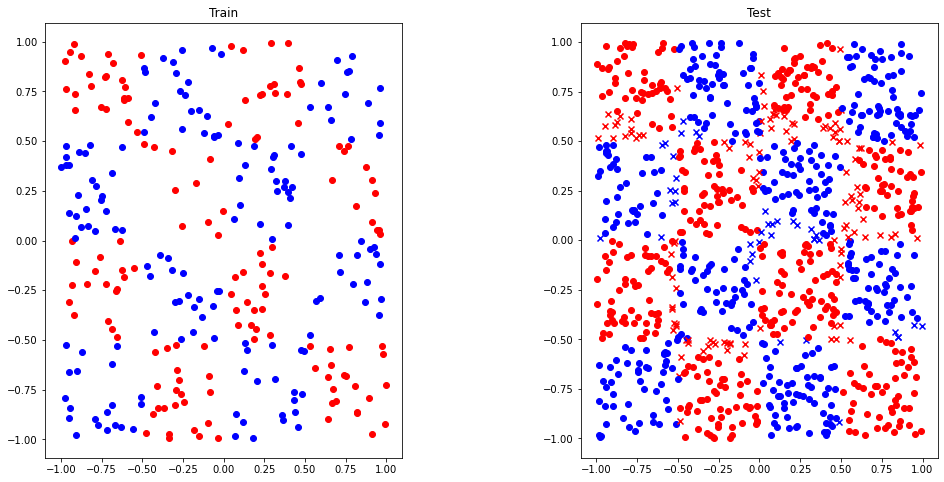

In [163]:
X_train2 = create_data(X_train,best_d)
X_test2 = create_data(X_test,best_d)

clf = SVC(C=best_C, kernel='poly')            
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

afficher(X_train,y_train,X_test,y_test,y_pred) 

On remarque que le noyau gaussien nous a donné les meilleurs résultats avec 91.5% de précision sur le test

# Exercice 2

Dans l'exercice précédent, on a trouvé que le noyau gaussien était le meilleur pour prédire la classe de X.
L'objectif de cet exercice est de montrer que ce n'est pas tout le temps le cas, on va voir que pour une forme de classe et un nombre d'échantillons différents, les résultats seront différents.

## Noyau polynomial

In [164]:
def y2(x1,x2):
    if (50*x1**2+0.5*x2**2-1)>0:
        return 1
    else:
        return -1

    
def ech_train_test2(nbApp, nbTest):
    X_train = np.random.uniform(-1, 1, (nbApp, 2))
    y_train = np.zeros(nbApp)
    X_test = np.random.uniform(-1, 1, (nbTest, 2))
    y_test = np.zeros(nbTest)
    for i in range(nbApp):
        y_train[i] = y2(X_train[:,0][i], X_train[:,1][i])
    for j in range(nbTest):
        y_test[j] = y2(X_test[:,0][j], X_test[:,1][j])
    return X_train, y_train, X_test, y_test

nbApp = 150; nbTest = 500
X_train, y_train, X_test, y_test = ech_train_test2(nbApp, nbTest)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


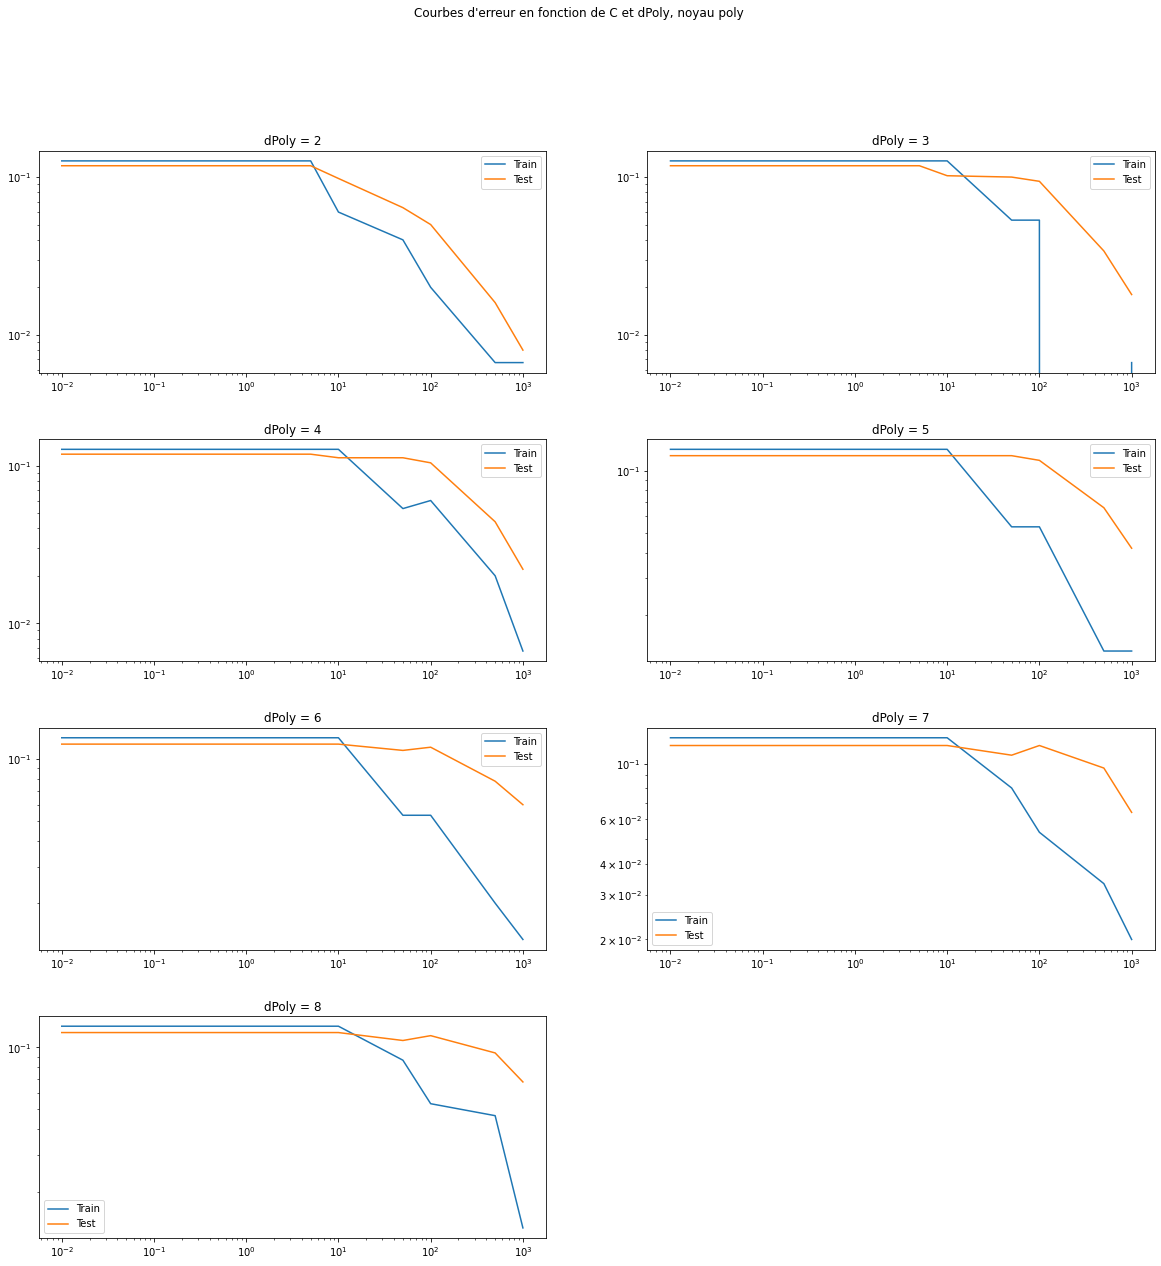

In [165]:
dpoly=[i for i in range(2,9)]

C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
best_err = 1
best_C = 0
best_d = 0
best_precision = 0
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)

for d in tqdm(dpoly):
    X_train2 = create_data(X_train,d)
    X_test2 = create_data(X_test,d)
    err_test=[]
    err_train=[]
    
    for c in C:
        clf = SVC(C=c, kernel='poly')
        clf.fit(X_train2,y_train)
        y_pred = clf.predict(X_test2)
        err_train+=[1-clf.score(X_train2,y_train)]
        err_test+=[1-AS(y_pred,y_test)]
        if (1-AS(y_pred,y_test))<best_err :        #on garde en mémoire les best params
            best_err = 1-AS(y_pred,y_test)
            best_precision = AS(y_pred,y_test)
            best_C = c
            best_d = d

    plt.subplot(4,2,d-1)
    plt.title("dPoly = "+str(d))
    plt.loglog(C,err_train,label="Train")
    plt.loglog(C,err_test,label="Test")
    plt.legend()
plt.suptitle("Courbes d'erreur en fonction de C et dPoly, noyau poly")
plt.show()
    
    


In [102]:
print("Meilleur score atteint pour dpoly = ", best_d ,"\n C =", best_C, "\n Precision associée :", best_precision, "\n Erreur associée :", best_err )

Meilleur score atteint pour dpoly =  3 
 C = 500 
 Precision associée : 0.974 
 Erreur associée : 0.026000000000000023


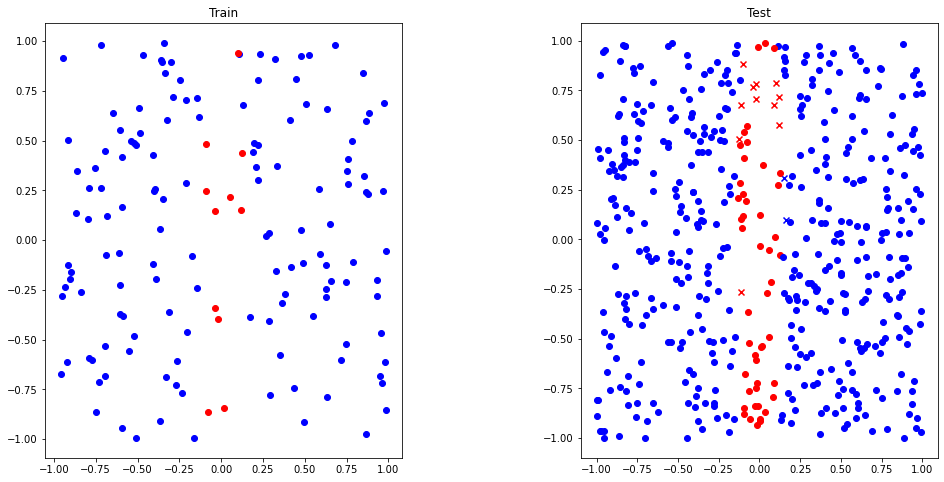

In [103]:
X_train2 = create_data(X_train,best_d)
X_test2 = create_data(X_test,best_d)
    
clf = SVC(C=best_C, kernel='poly')
clf.fit(X_train2,y_train)
y_pred = clf.predict(X_test2)

afficher(X_train,y_train,X_test,y_test,y_pred)

## Noyau gaussien

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


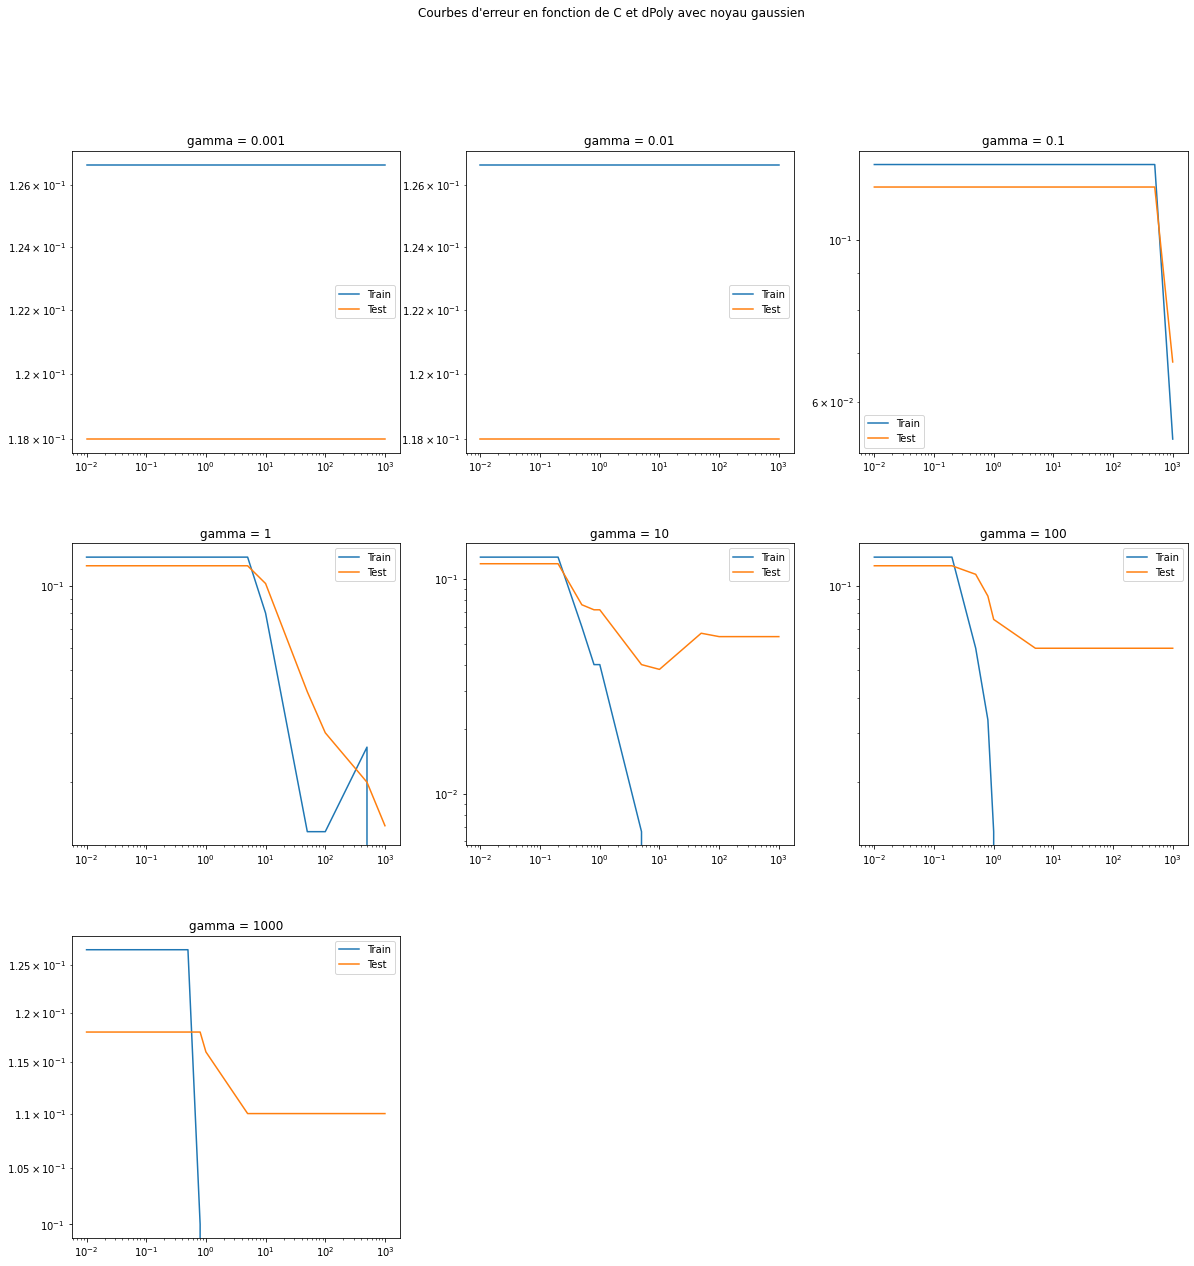

In [166]:
gammas = [0.001, 0.01, 0.1, 1, 10, 100,1000]

C=[.01,.1,.2,.5,.8,1,5,10,50,100,500,1000]
best_err = 1
best_C = 0
best_gamma = 0
best_precision = 0
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
i=0

for gamma in tqdm(gammas):
    err_test=[]
    err_train=[]
    
    for c in C:
        clf = SVC(C=c, gamma = gamma, kernel ='rbf')
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        err_train+=[1-clf.score(X_train,y_train)]
        err_test+=[1-AS(y_pred,y_test)]
        if (1-AS(y_pred,y_test))<best_err :        #on garde en mémoire les best params
            best_err = 1-AS(y_pred,y_test)
            best_precision = AS(y_pred,y_test)
            best_C = c
            best_gamma = gamma
    i+=1
    plt.subplot(3,3,i)
    plt.title("gamma = "+str(gamma))
    plt.loglog(C,err_train,label="Train")
    plt.loglog(C,err_test,label="Test")
    plt.legend()
plt.suptitle("Courbes d'erreur en fonction de C et dPoly avec noyau gaussien")
plt.show()

In [167]:
print("Meilleur score atteint pour gamma = ", best_gamma ,"\n C =", best_C, "\n Precision associée :", best_precision, "\n Erreur associée :", best_err )

Meilleur score atteint pour gamma =  1 
 C = 1000 
 Precision associée : 0.986 
 Erreur associée : 0.014000000000000012


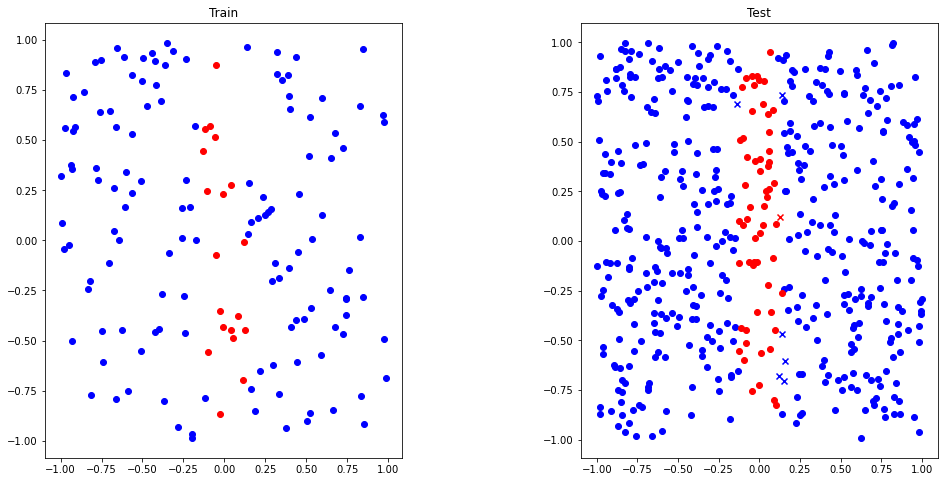

In [168]:
clf = SVC(C=best_C,gamma=best_gamma, kernel='rbf')            
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

afficher(X_train,y_train,X_test,y_test,y_pred) 

### Commentaires :
Dans ce 2e exemple, on voit que les résultats sont sensiblement les mêmes pour le noyau gaussien et le noyau polynomial (97% et 98% de précision). Le choix du noyau dépend surtout de la forme des classes, même si en général, le noyau gaussien qui est le plus usité donnera de bons résultats.